### Student Information
Name: Gideon Levi

Student ID: 109006114

GitHub ID: gideonlevi

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each teDFt. This will generating a document matriDF, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfiDFVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

## 1. Exercises (take home)

In [1]:
## Begin Assignment Here

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

**Exercise 2** (take home)

In [2]:
# Answer here

# accessing by attribute
X.category_name

# selection by callable
X.loc[lambda x: x['category'] > 1, :] # same as X.loc[X['category'] > 1, :]
X[lambda x: x.columns[2]] # same as X.iloc[:, 2]
X.iloc[:, lambda x: [0, 1]] # same as # X.iloc[:, [0,1]]

# selecting random samples
X.sample(frac=0.5)

# fast scalar value getting and setting
X.at[0, 'text']
X.iat[0, 0]

'From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. '

**Exercise 5** (take home)

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
print(NA_df)
print(NA_df['missing_example'].isnull())

  id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F                
0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool


In [4]:
# Answer here
print(type('NaN'), type('None'), type(''))

<class 'str'> <class 'str'> <class 'str'>


Exercise 5 answer : .isnull didn't work because 'NaN', 'None', and '' are all string type, and since characters such as empty strings '' or numpy.inf are not considered NA values by pandas.DataFrame.isnull() (unless you set pandas.options.mode.use_inf_as_na = True).


In [5]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


**Exercise 6** (take home)

In [6]:
# Answer here
print(X.shape)
print(len(X[X['category'] == 0]))
print(len(X[X['category'] == 1]))
print(len(X[X['category'] == 2]))
print(len(X[X['category'] == 3]))

print(X_sample.shape)
print(len(X_sample[X_sample['category'] == 0]))
print(len(X_sample[X_sample['category'] == 1]))
print(len(X_sample[X_sample['category'] == 2]))
print(len(X_sample[X_sample['category'] == 3]))

(2257, 3)
480
584
594
599
(1000, 3)
206
247
277
270


Exercise 6 answer : 

Changes I noticed:

-The length of X_sample dataframe is shorter than the length of X dataframe since X_sample dataframe is only a subset of X dataframe.

-The ratio of categories in X is different with ratio of categories in X_sample, it is because X_sample dataframe is created by randomly selecting 1000 data from X dataframe.

**Exercise 8** (take home)

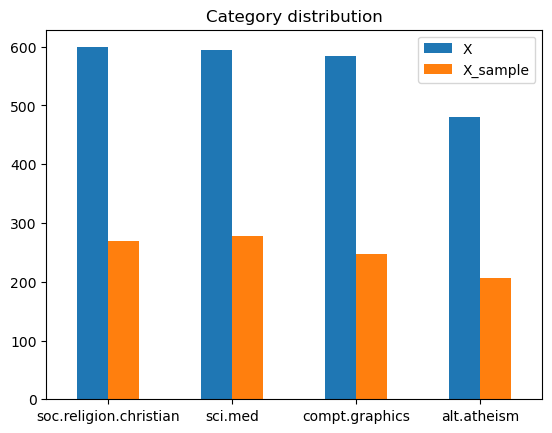

In [7]:
import matplotlib.pyplot as plt

# Answer here
X_count = [int(X[X['category_name'] == 'soc.religion.christian'].category_name.value_counts().values[0]),
           int(X[X['category_name'] == 'sci.med'].category_name.value_counts().values[0]),
           int(X[X['category_name'] == 'comp.graphics'].category_name.value_counts().values[0]),
            int(X[X['category_name'] == 'alt.atheism'].category_name.value_counts().values[0])]
X_sample_count = [int(X_sample[X_sample['category_name'] == 'soc.religion.christian'].category_name.value_counts().values[0]),
                 int(X_sample[X_sample['category_name'] == 'sci.med'].category_name.value_counts().values[0]),
                 int(X_sample[X_sample['category_name'] == 'comp.graphics'].category_name.value_counts().values[0]),
                 int(X_sample[X_sample['category_name'] == 'alt.atheism'].category_name.value_counts().values[0])]
index = ['soc.religion.christian', 'sci.med', 'compt.graphics', 'alt.atheism']
df = pd.DataFrame({'X': X_count,
                   'X_sample': X_sample_count}, index=index)
ax = df.plot.bar(rot=0, title='Category distribution')

In [8]:
import nltk
nltk.download('punkt')

# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

analyze = count_vect.build_analyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gideon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


**Exercise 10** (take home)

In [9]:
# Answer here

# find indices of term that have frequency more than 0
indices = [idx for idx, val in enumerate(X_counts[4, :100].toarray()[0]) if val > 0]
print(indices)
count_vect.get_feature_names_out()[indices]

# print(X_counts[4, :100].toarray()[0])
# [idx for idx, val in enumerate(X_counts[4, :100].toarray()[0]) if val > 0]

# find the term on index 37
count_vect.get_feature_names_out()[37]

[0, 37]


'01'

**Exercise 11** (take home)

['term_the', 'term_of', 'term_to', 'term_and', 'term_is', 'term_in', 'term_that', 'term_it', 'term_you', 'term_for', 'term_not', 'term_this', 'term_be', 'term_from', 'term_are', 'term_edu', 'term_have', 'term_as', 'term_on', 'term_with', 'term_but', 'term_or', 'term_if', 'term_was', 'term_can', 'term_we', 'term_there', 'term_by', 'term_what', 'term_subject']
['doc_1052', 'doc_179', 'doc_644', 'doc_1104', 'doc_1770', 'doc_1469', 'doc_863', 'doc_249', 'doc_1503', 'doc_1869', 'doc_1270', 'doc_73', 'doc_654', 'doc_845', 'doc_1195', 'doc_1903', 'doc_1712', 'doc_191', 'doc_1049', 'doc_1653', 'doc_1152', 'doc_856', 'doc_1339', 'doc_803', 'doc_2001', 'doc_2219', 'doc_846', 'doc_1667', 'doc_1014', 'doc_1504']
[[10  7  2  3  3  2  1  0  2  0  0  3  1  1  1  2  1  0  0  0  0  1  1  0
   0  0  0  1  0  1]
 [23 11  5  7  4  6  3  2  7  2  2  3  2  4  4  0  5  3  1  2  2  4  1  0
   0  0  2  1  2  1]
 [20 12 11 14 15  8 18  6  3  1  7  2  5  2  3  1  2  4  0  1  4  4  1  8
   0  0  2  3  2  2]
 [ 3 

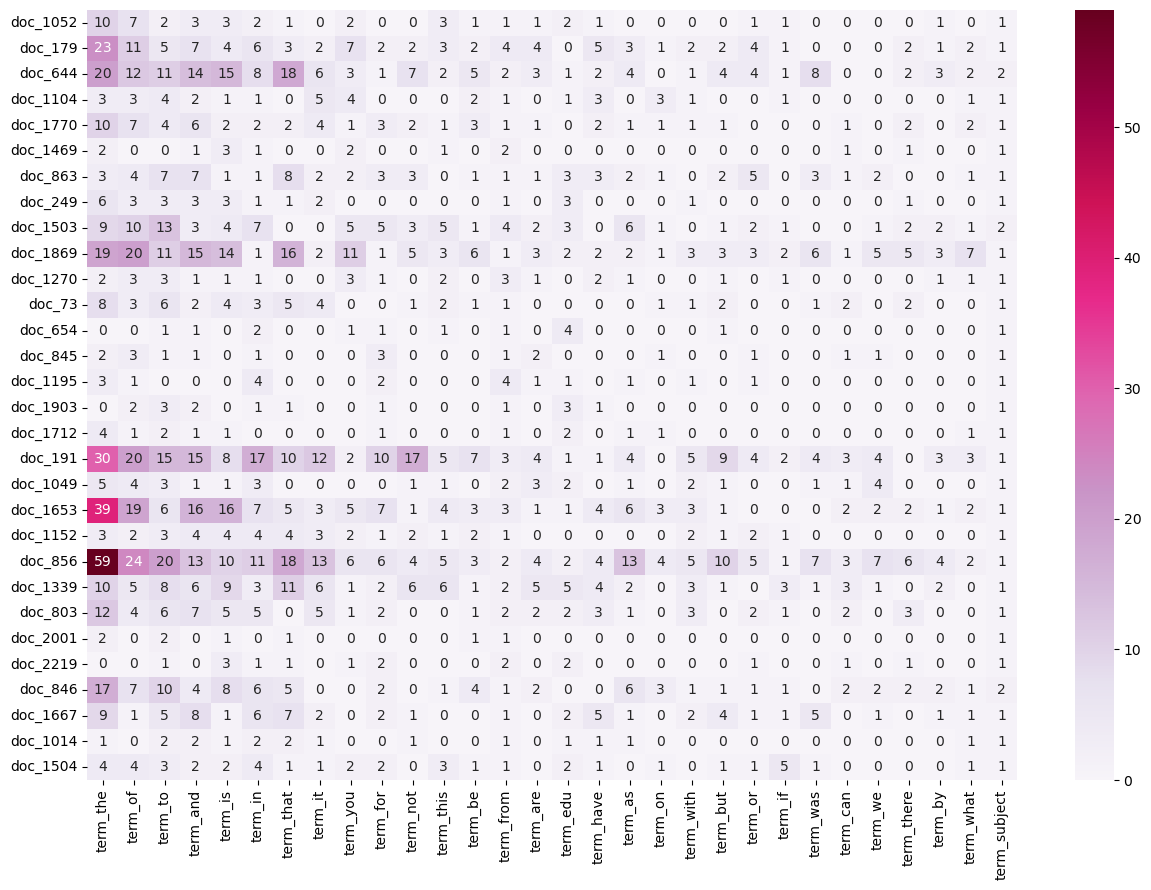

In [10]:
import seaborn as sns

# Answer here
# Take terms with top 30 frequencies

# calculate each term frequencies in all documents
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# sort the term frequencies in descending order and get the indices of the top 30 terms
top30_terms_indices = np.argsort(term_frequencies)[::-1][:30]

y_sample = np.random.choice(X_counts.shape[0], size=30, replace=False)

# obtain terms names
plot_x = ["term_"+str(count_vect.get_feature_names_out()[i]) for i in top30_terms_indices]
print(plot_x)

# obtain document index
plot_y = ["doc_"+ str(X.index[i]) for i in y_sample]
print(plot_y)

# X_counts[how many documents, how many terms]
plot_z = X_counts[y_sample][:, top30_terms_indices].toarray() 
print(plot_z)

# plot the heat-map for the above term-document  matrix
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max(np.ndarray.flatten(plot_z)), annot=True)

**Exercise 12** (take home)

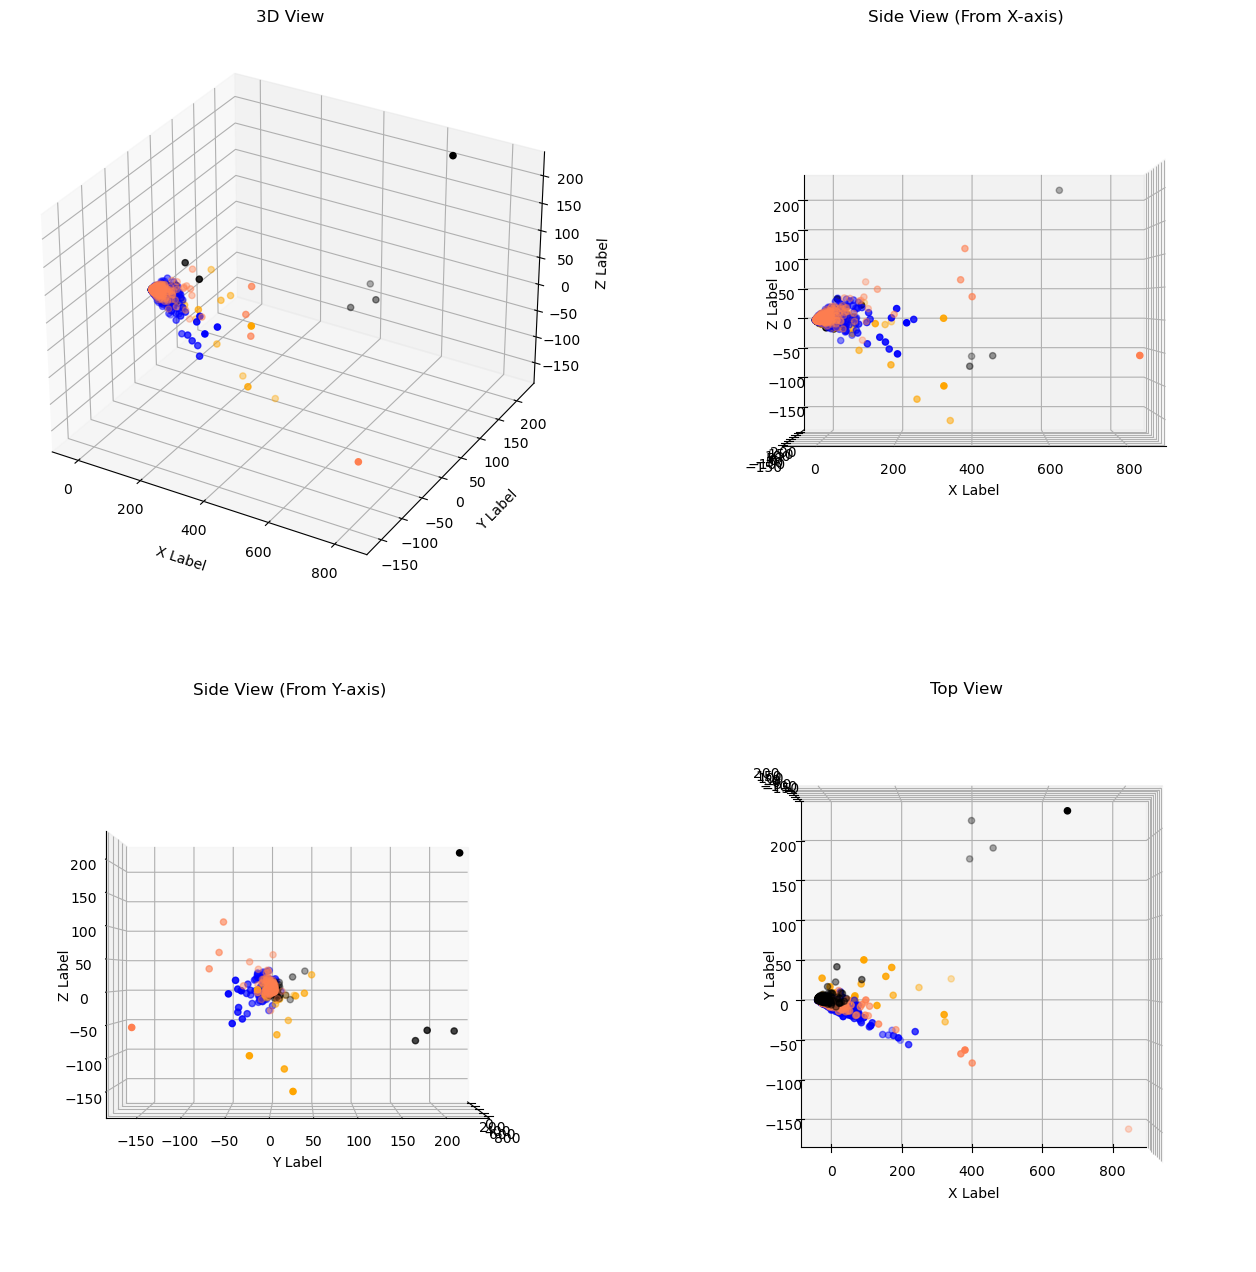

In [11]:
from sklearn.decomposition import PCA

# Answer here
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

fig = plt.figure(figsize = (16, 16))

# Plot 1
ax = fig.add_subplot(2,2,1, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('3D View')
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')


# Plot 2
ax = fig.add_subplot(2,2,2, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('Side View (From X-axis)')
ax.set_xlabel('\nX Label')
ax.set_zlabel('\nZ Label')

ax.view_init(0,-90,0)


# Plot 3
ax = fig.add_subplot(2,2,3, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('Side View (From Y-axis)')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
#ax.zaxis.labelpad = -2

ax.view_init(0,0,0)


# Plot 4
ax = fig.add_subplot(2,2,4, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('Top View')
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

ax.view_init(90,-90,0)

plt.show()

After viewing it in different angles, i found that the difference between reducing the dataframe to 3 dimension and 2 dimension
is not much as most of the data after reduced to 3 dimension don't have any new "separation" of data, and the "grouping" of data
are roughly similar. This means there are hardly any benefits of increasing the PCA dimension from 2 to 3.

**Exercise 13** (take home)

In [12]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Answer here

import plotly.express as px

# create a DataFrame for Plotly Express
data = {
    "Feature Name": count_vect.get_feature_names_out()[:300],
    "Term Frequencies": term_frequencies[:300]
}
df = pd.DataFrame(data)

# create a bar plot using Plotly Express
fig = px.bar(df, x="Feature Name", y='Term Frequencies')
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for readability

# set the figure's size
fig.update_layout(width=1000, height=300)

# show the plot
fig.show()

**Exercise 14** (take home)

In [13]:
# Answer here

# Here I only visualize terms that has frequency more than 1.
# Create a DataFrame for Plotly Express
data = {
    "Feature Name": count_vect.get_feature_names_out()[:300],
    "Term Frequencies": term_frequencies[0:300]
}
df = pd.DataFrame(data)
df_filtered = df[df['Term Frequencies'] > 1]

# Create a bar plot using Plotly Express
fig = px.bar(df_filtered, x="Feature Name", y='Term Frequencies')
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for readability

# Set the figure's size
# fig.update_layout(width=1000, height=300)

# Show the plot
fig.show()

**Exercise 15** (take home)

[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

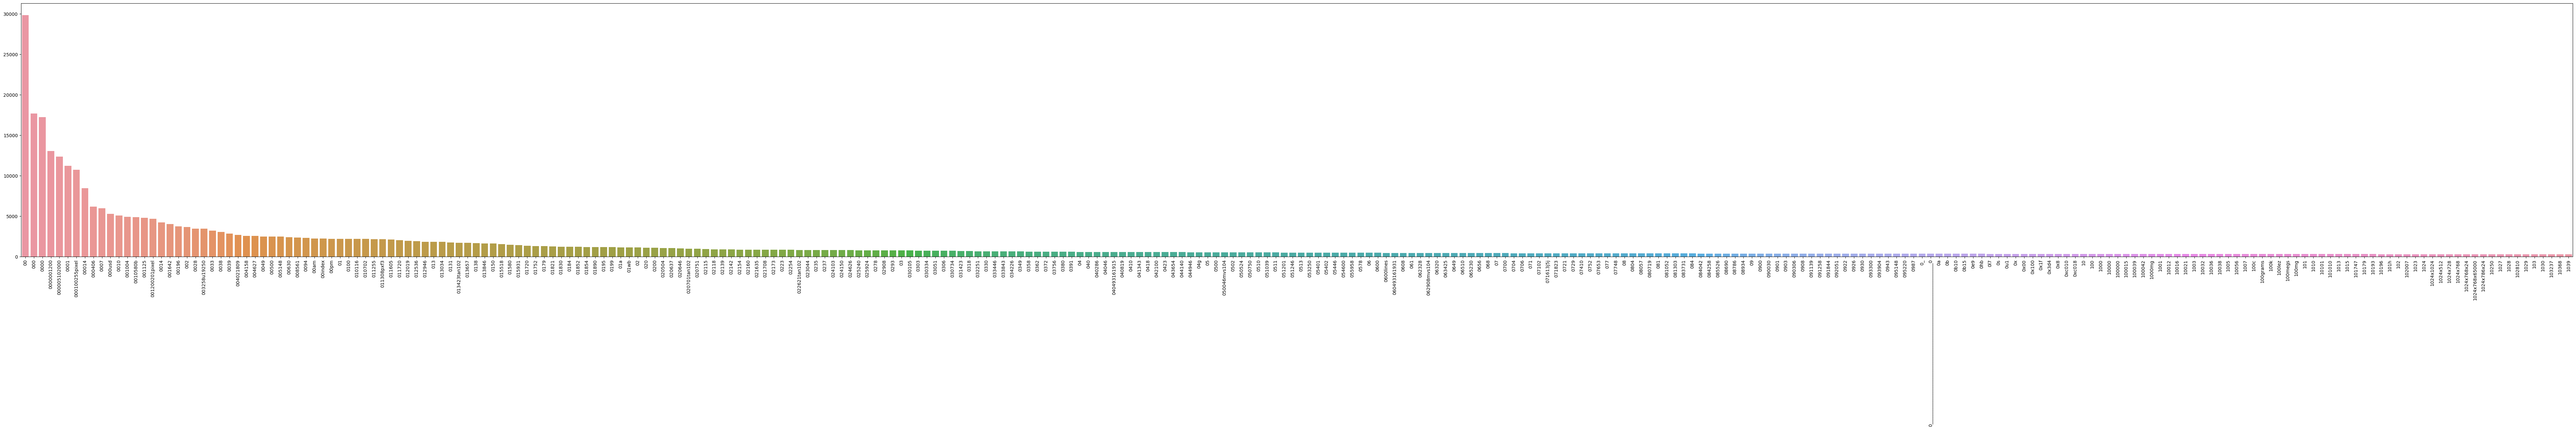

In [14]:
# Answer here

# get the sorted indices of term_frequencies vector, and reverse it
sorted_indices = np.argsort(term_frequencies)[::-1]
# create another vector using sorted_indices to get new sorted vector of term_frequencies
sorted_term_frequencies = term_frequencies[sorted_indices]

# plot the sorted_term_frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[sorted_indices][:300], 
            y=sorted_term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

**Exercise 16** (take home)

In [15]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

# Answer here

X['new_bin_category'] = mlb.fit_transform(X['category_name']).tolist()
X[:10]

,text,category,category_name,unigrams,new_bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[From, :, libman, @, hsc.usc.edu, (, Marlena, ...","[0, 0, 1, 0]"


## 2.

#### 2. Data Preparation

In [16]:
# DATA PREPARATION AND TRANSFORMATION
import pandas as pd

# define the path to dataset files
amazon_file_path  = './sentiment labelled sentences/amazon_cells_labelled.txt'
imdb_file_path = './sentiment labelled sentences/imdb_labelled.txt'
yelp_file_path = './sentiment labelled sentences/yelp_labelled.txt'

# define column names for the DataFrame
categories = ['sentence', 'score']

# read each dataset from the files to a pandas dataframe
amazon_DF = pd.read_csv(amazon_file_path, sep='\t', names=categories)
print("Length of amazon_DF:", len(amazon_DF))
imdb_DF = pd.read_csv(imdb_file_path, sep='\s\t', names=categories, engine='python')
print("Length of imdb_DF:", len(imdb_DF))
yelp_DF = pd.read_csv(yelp_file_path, sep='\t', names=categories)
print("Length of yelp_DF:", len(yelp_DF))

# combine all 3 dataframes into 1 dataframe
DF = pd.concat([amazon_DF, imdb_DF, yelp_DF], ignore_index=True)
print("Length of combined DF:", len(DF))

# print length of data with score 0 and 1 respectively
print(len(DF[DF['score'] == 0]), len(DF[DF['score'] == 1]))

Length of amazon_DF: 1000
Length of imdb_DF: 1000
Length of yelp_DF: 1000
Length of combined DF: 3000
1500 1500


**Exercise 1**
In this exercise, please print out the *text* data for the first three samples in the dataset.

In [17]:
# Answer here
for i in range(0,3):
    print('\n'.join(DF.sentence[i].split('\n')))
    print()

So there is no way for me to plug it in here in the US unless I go by a converter.

Good case, Excellent value.

Great for the jawbone.



#### 3. Data Transformation

**Exercise 2**
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [18]:
# Answer here

# accessing by attribute
DF.score

# selection by callable
DF.loc[lambda x: x['score'] == 1, :] # same as DF.loc[X['category'] > 1, :]
DF[lambda x: x.columns[1]] # same as DF.iloc[:, 1]
DF.iloc[:, lambda x: [0, 1]] # same as # DF.iloc[:, [0,1]]

# selecting random samples
DF.sample(frac=0.5)

#fast scalar value getting and setting
DF.at[0, 'sentence']
DF.iat[0, 0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

**Exercise 3**
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [19]:
# Answer here

# fetch all records with score 1, then query every 10th record and show only the first 5 records.
scimed_records = DF.loc[DF['score'] == 1]
print(scimed_records[::10].head(5))

                                             sentence  score
1                         Good case, Excellent value.      1
21  I bought this to use with my Kindle Fire and a...      1
44                       Excellent bluetooth headset.      1
61  I really recommend this faceplates since it lo...      1
78  I love this phone , It is very handy and has a...      1


In [20]:
# query every 10th record first, then fetch only the records with score 1, and only show the first 5 records
every_10th_record = DF.loc[::10]
print(every_10th_record[every_10th_record['score'] == 1].head(5))

                                              sentence  score
10                     And the sound quality is great.      1
40   It has a great camera thats 2MP, and the pics ...      1
80       I wear it everyday and it holds up very well.      1
100  Integrated seamlessly with the Motorola RAZR p...      1
110  Sound quality on both end is excellent, I use ...      1


#### 4. Data Mining using Pandas

#### 4.1 Dealing with Missing Values

In [21]:
# CHECK FOR MISSING VALUES
import helpers.data_mining_helpers as dmh

# check for missing values on axis 0
DF.isnull().apply(lambda x: dmh.check_missing_values(x), axis=0)

,sentence,score
0,The amount of missing records is:,The amount of missing records is:
1,0,0


**Exercise 4** Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  

In [22]:
# check for missing values on axis 1
DF.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amount of missing records is: , 0)
1       (The amount of missing records is: , 0)
2       (The amount of missing records is: , 0)
3       (The amount of missing records is: , 0)
4       (The amount of missing records is: , 0)
                         ...                   
2995    (The amount of missing records is: , 0)
2996    (The amount of missing records is: , 0)
2997    (The amount of missing records is: , 0)
2998    (The amount of missing records is: , 0)
2999    (The amount of missing records is: , 0)
Length: 3000, dtype: object

In [23]:
# get rid of records with missing value (if any)
DF.dropna(inplace=True)

# check new length of dataframe
len(DF)

3000

**Exercise 5** Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [24]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [25]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [26]:
# Answer here
print(type('NaN'), type('None'), type(''))

<class 'str'> <class 'str'> <class 'str'>


Because 'NaN', 'None', and '' are all string type and not considered as null.

#### 4.2 Dealing with Duplicate Data

In [27]:
# CHECK FOR DUPLICATED DATA

# checks for duplicates
DF.duplicated('sentence', keep='first')

# check the sum of duplicates
print("Sum of duplicates:", sum(DF.duplicated('sentence')))

# get rid of duplicate records (if any) but keep the first occurence 
DF.drop_duplicates(keep='first', inplace=True)

# check new length of dataframe
print("Length of non-duplicate data", len(DF))

Sum of duplicates: 17
Length of non-duplicate data 2983


In [28]:
# DATA PREPROCESSING

# SAMPLING

# sample 10000 record from the original records
DF_sample = DF.sample(n=1000) #random state
display(DF_sample) #display sampled records
print(len(DF_sample[DF_sample['score'] == 0]), len(DF_sample[DF_sample['score'] == 1]))

,sentence,score
735,"Provides good protection and looks classy, too.",1
919,"Saggy, floppy piece of junk.",0
810,Improper description.... I had to return it.,0
75,Love this product.,1
130,It is so small and you don't even realize that...,1
...,...,...
838,"Reaching for the bottom row is uncomfortable, ...",0
2765,Tasted like dirt.,0
1371,The plot was the same as pretty much every oth...,0
659,"It felt too light and ""tinny."".",0


506 494


**Exercise 6** Notice any changes from the `DF` dataframe to the `DF_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `DF`. Feel free to query and look more closely at the dataframe for these changes.

In [29]:
# Answer here
print(DF.shape)
print(len(DF[DF['score'] == 0]))
print(len(DF[DF['score'] == 1]))

print(DF_sample.shape)
print(len(DF_sample[DF_sample['score'] == 0]))
print(len(DF_sample[DF_sample['score'] == 1]))

(2983, 2)
1493
1490
(1000, 2)
506
494


Changes I noticed:

-The length of DF_sample dataframe is shorter than the length of DF dataframe since DF_sample dataframe is only a subset of DF dataframe.

-The ratio of categories in X is different with ratio of categories in DF_sample, it is because DF_sample dataframe is created by randomly selecting 1000 data from DF dataframe.

**Exercise 7** Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'Score distribution'}, xlabel='score'>

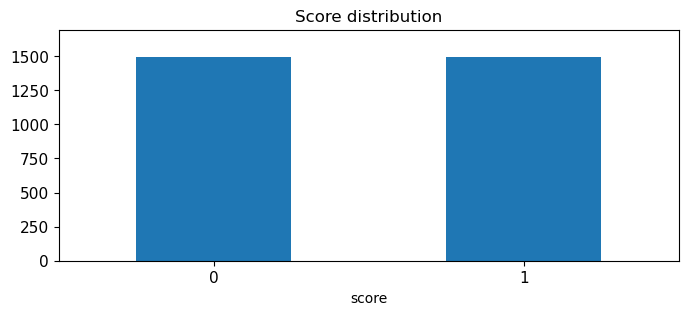

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot barchart for DF
upper_bound = max(DF.score.value_counts() + 200) # calculate the ylim parameters for the barchart
DF.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Score distribution'}, xlabel='score'>

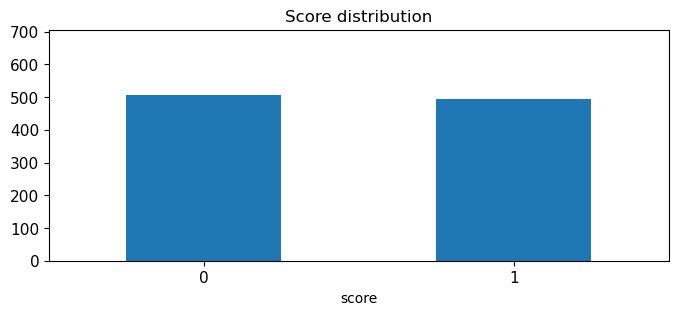

In [31]:
# plot barchart for DF_sample
upper_bound = max(DF_sample.score.value_counts() + 200) # calculate the ylim parameters for the barchart
DF_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

**Exercise 8** We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise.

1493 1490
506 494


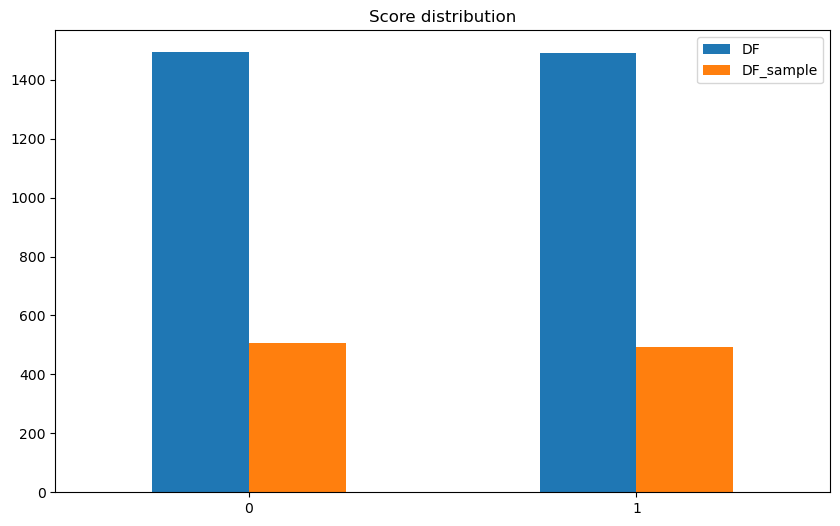

In [32]:
# plot a side by side comparison of the distribution between dataset DF and DF_sample
DF_count = [int(DF[DF['score'] == 0].score.value_counts().values[0]),
           int(DF[DF['score'] == 1].score.value_counts().values[0])]
DF_sample_count = [int(DF_sample[DF_sample['score'] == 0].score.value_counts().values[0]),
           int(DF_sample[DF_sample['score'] == 1].score.value_counts().values[0])]
index = ['0', '1']
df = pd.DataFrame({'DF': DF_count,
                   'DF_sample': DF_sample_count}, index=index)
ax = df.plot.bar(rot=0, title='Score distribution', figsize=(10,6))
# print values of DF_count and DF_sample_count
print(int(DF[DF['score'] == 0].score.value_counts().values[0]), int(DF[DF['score'] == 1].score.value_counts().values[0]))
print(int(DF_sample[DF_sample['score'] == 0].score.value_counts().values[0]), int(DF_sample[DF_sample['score'] == 1].score.value_counts().values[0]))

#### 5.2 Feature Creation

In [33]:
# FEATURE CREATION

import nltk
nltk.download('punkt')

# create a new feature called unigrams
DF['unigrams'] = DF['sentence'].apply(lambda x: dmh.tokenize_text(x))
list(DF[0:1]['unigrams']) # delete later

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gideon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

#### 5.3 Feature subset selection

In [34]:
# FEATURE SUBSET SELECTION

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
DF_counts = count_vect.fit_transform(DF.sentence) #learn the vocabulary and return document-term matrix
print(DF_counts.shape) # delete later
print(DF_counts[0]) # delete later

analyze = count_vect.build_analyzer()

(2983, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


**exercise 9** Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [35]:
# Answer here
# How do we turn our array[0] sentence into a tokenized text using the build_analyzer()?
analyze(DF.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [36]:
# get 10 first feature names out
count_vect.get_feature_names_out()[0:10]

DF_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

**Exercise 10** 
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [37]:
# Answer here
# find indices of term that have frequency more than 0
indices = [idx for idx, val in enumerate(DF_counts[3, :100].toarray()[0]) if val > 0]
print(indices)
count_vect.get_feature_names_out()[indices]

[45]


array(['45'], dtype=object)

In [38]:
# plot a heatmap of term-document matrix

# thirty features only (starting from 51th term)
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[50:80]]
print(plot_x)

# obtain thirty document index (starting from 51th document)
plot_y = ["doc_"+ str(i) for i in list(DF.index)[50:80]]
print(plot_y)

plot_z = DF_counts[50:80, 50:80].toarray() #DF_counts[how many documents, how many terms]
print(plot_z)

['term_510', 'term_5320', 'term_54', 'term_5lb', 'term_680', 'term_70', 'term_70000', 'term_700w', 'term_70s', 'term_80', 'term_80s', 'term_8125', 'term_85', 'term_8525', 'term_8530', 'term_8pm', 'term_90', 'term_95', 'term_99', 'term_aailiyah', 'term_abandoned', 'term_abhor', 'term_ability', 'term_able', 'term_abound', 'term_about', 'term_above', 'term_abroad', 'term_absolute', 'term_absolutel']
['doc_50', 'doc_51', 'doc_52', 'doc_53', 'doc_54', 'doc_55', 'doc_56', 'doc_57', 'doc_58', 'doc_59', 'doc_60', 'doc_61', 'doc_62', 'doc_63', 'doc_64', 'doc_65', 'doc_66', 'doc_67', 'doc_68', 'doc_69', 'doc_70', 'doc_71', 'doc_72', 'doc_73', 'doc_74', 'doc_75', 'doc_76', 'doc_77', 'doc_78', 'doc_79']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

,term_510,term_5320,term_54,term_5lb,term_680,term_70,term_70000,term_700w,term_70s,term_80,...,term_abandoned,term_abhor,term_ability,term_able,term_abound,term_about,term_above,term_abroad,term_absolute,term_absolutel
doc_50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
doc_56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_58,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


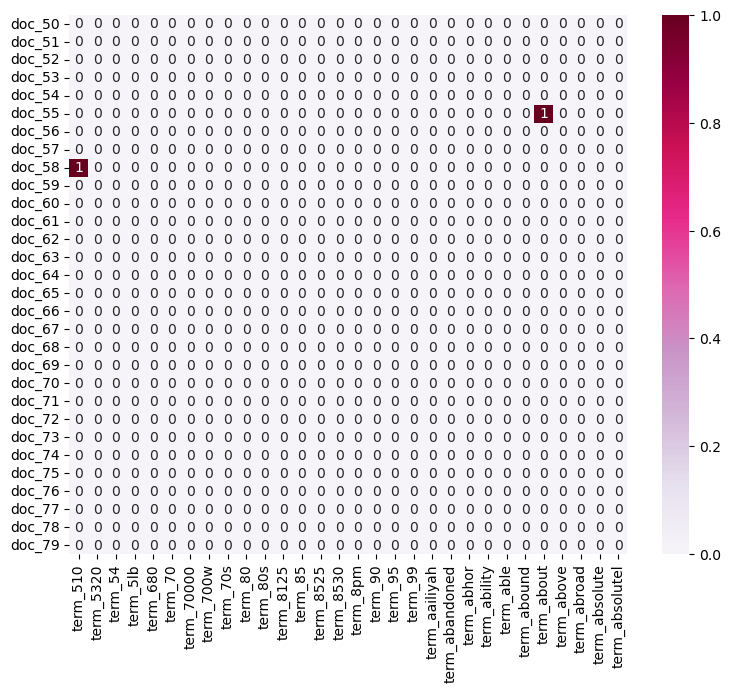

In [39]:
import seaborn as sns

DF_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(DF_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(DF_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

**Exercise 11**  From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization.

['term_the', 'term_and', 'term_it', 'term_is', 'term_to', 'term_this', 'term_of', 'term_was', 'term_in', 'term_for', 'term_that', 'term_not', 'term_with', 'term_my', 'term_very', 'term_good', 'term_on', 'term_you', 'term_great', 'term_but', 'term_have', 'term_movie', 'term_are', 'term_as', 'term_so', 'term_phone', 'term_film', 'term_be', 'term_all', 'term_one']
['doc_926', 'doc_2761', 'doc_2113', 'doc_270', 'doc_2959', 'doc_2308', 'doc_1267', 'doc_1404', 'doc_1077', 'doc_1115', 'doc_1110', 'doc_700', 'doc_2173', 'doc_2985', 'doc_1224', 'doc_370', 'doc_2501', 'doc_2970', 'doc_917', 'doc_1787', 'doc_930', 'doc_2706', 'doc_1256', 'doc_1906', 'doc_2856', 'doc_318', 'doc_2884', 'doc_601', 'doc_1492', 'doc_2418']
[[2 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [2 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 3 0 1 0 1 0 0 0 0 0 0

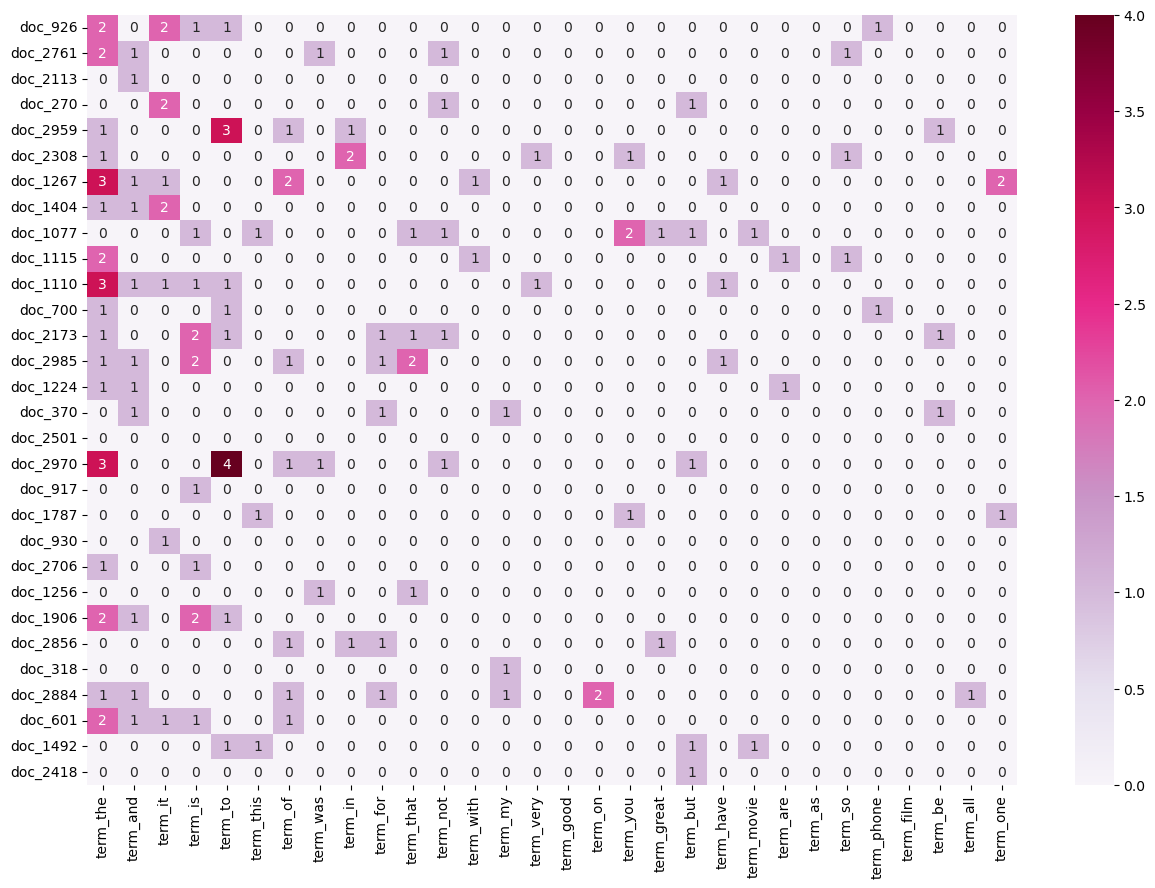

In [40]:
# Answer here
# Take terms with top 30 frequencies

# calculate each term frequencies in all documents
term_frequencies = np.asarray(DF_counts.sum(axis=0))[0]

# sort the term frequencies in descending order and get the indices of the top 30 terms
top30_terms_indices = np.argsort(term_frequencies)[::-1][:30]

y_sample = np.random.choice(DF_counts.shape[0], size=30, replace=False)

# obtain terms names
plot_x = ["term_"+str(count_vect.get_feature_names_out()[i]) for i in top30_terms_indices]
print(plot_x)

# obtain document index
plot_y = ["doc_"+ str(DF.index[i]) for i in y_sample]
print(plot_y)

# DF_counts[how many documents, how many terms]
plot_z = DF_counts[y_sample][:, top30_terms_indices].toarray() 
print(plot_z)

# plot the heat-map for the above term-document  matrix
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max(np.ndarray.flatten(plot_z)), annot=True)

#### 5.4 Dimensionality Reduction

(2983, 5155)


(2983, 2)


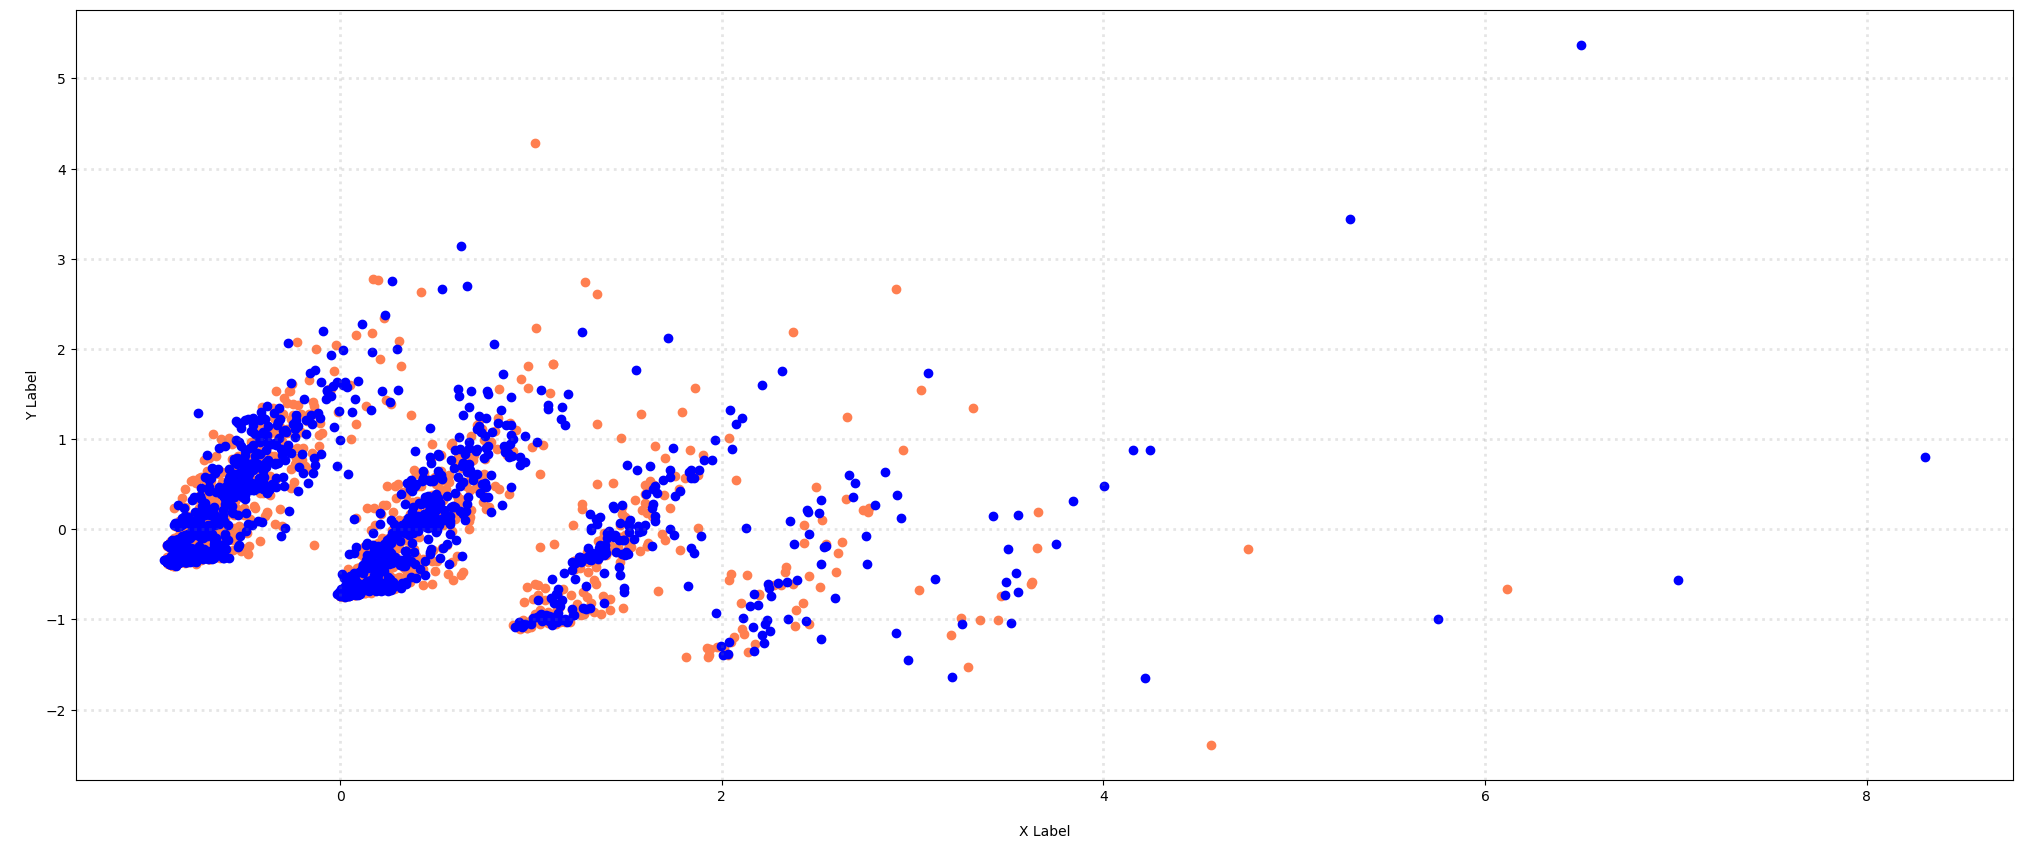

In [41]:
# DIMENSIONALITY REDUCTION

from sklearn.decomposition import PCA

# reduce dimension of DF to 2 with Principal Component Analysis
print(DF_counts.shape)
DF_reduced = PCA(n_components = 2).fit_transform(DF_counts.toarray())
print(DF_reduced.shape)


col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(col, [0, 1]):
    xs = DF_reduced[DF['score'] == score].T[0]
    ys = DF_reduced[DF['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

**Exercise 12** Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

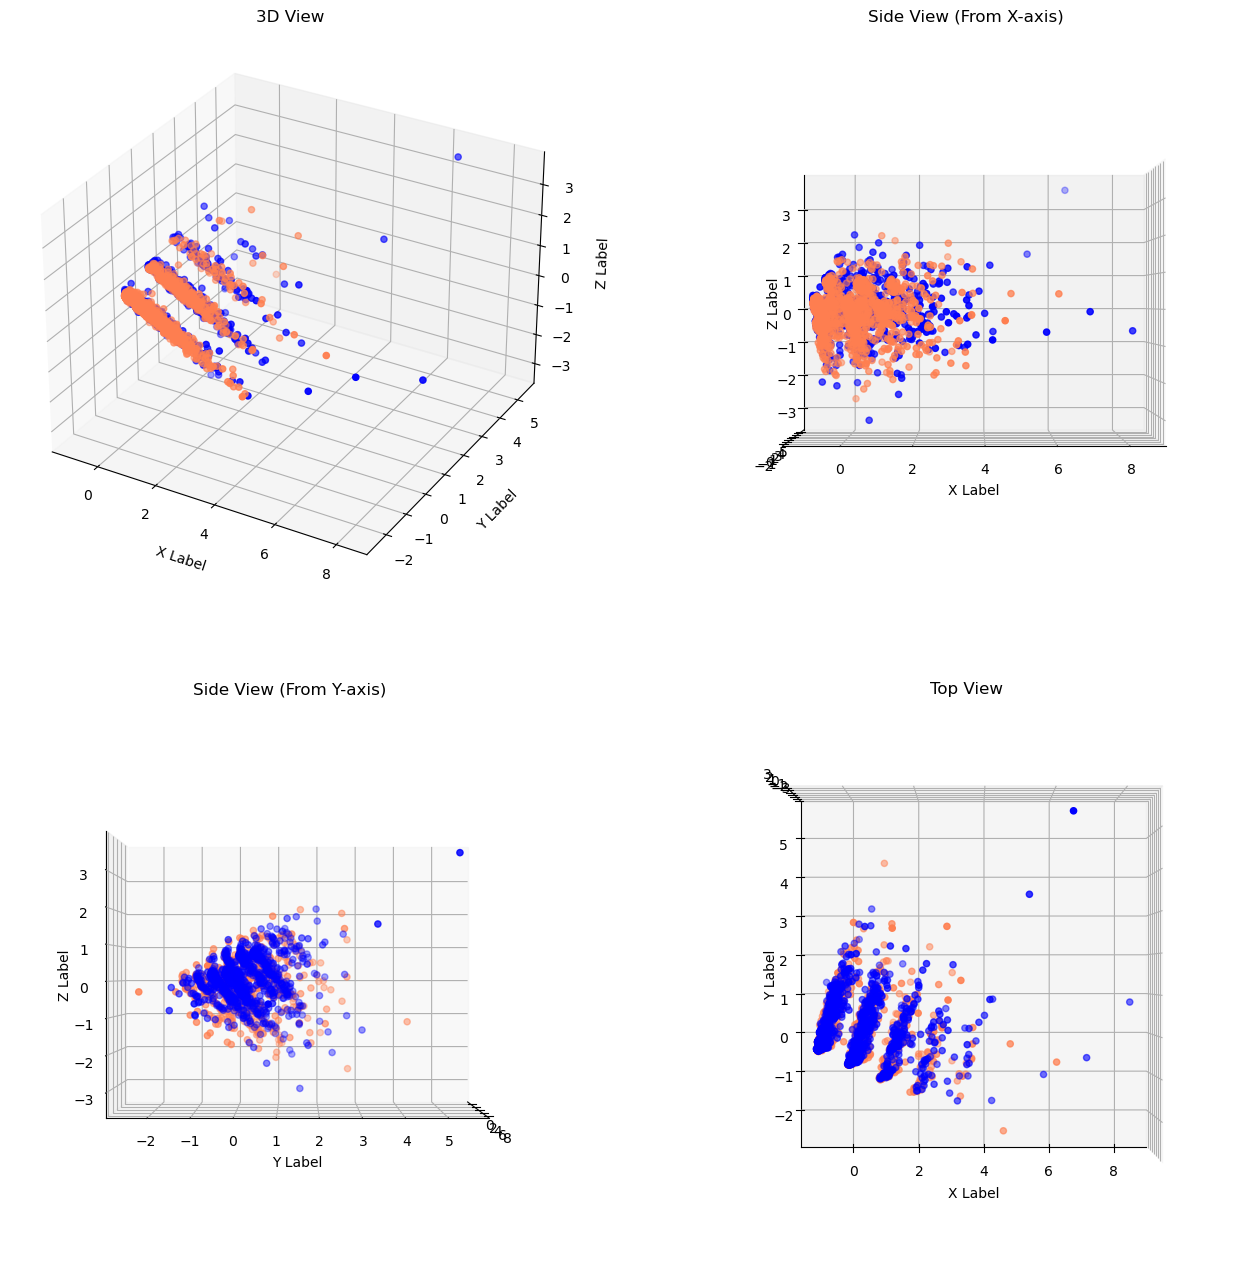

In [42]:
# reduce dataset to 3 components
DF_reduced = PCA(n_components=3).fit_transform(DF_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (16, 16))

# Plot 1
ax = fig.add_subplot(2,2,1, projection='3d')

for c, score in zip(col, [0, 1]):
    xs = DF_reduced[DF['score'] == score].T[0]
    ys = DF_reduced[DF['score'] == score].T[1]
    zs = DF_reduced[DF['score'] == score].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('3D View')
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')


# Plot 2
ax = fig.add_subplot(2,2,2, projection='3d')

for c, score in zip(col, [0, 1]):
    xs = DF_reduced[DF['score'] == score].T[0]
    ys = DF_reduced[DF['score'] == score].T[1]
    zs = DF_reduced[DF['score'] == score].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('Side View (From X-axis)')
ax.set_xlabel('\nX Label')
ax.set_zlabel('\nZ Label')

ax.view_init(0,-90,0)


# Plot 3
ax = fig.add_subplot(2,2,3, projection='3d')

for c, score in zip(col, [0, 1]):
    xs = DF_reduced[DF['score'] == score].T[0]
    ys = DF_reduced[DF['score'] == score].T[1]
    zs = DF_reduced[DF['score'] == score].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('Side View (From Y-axis)')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
#ax.zaxis.labelpad = -2

ax.view_init(0,0,0)


# Plot 4
ax = fig.add_subplot(2,2,4, projection='3d')

for c, score in zip(col, [0, 1]):
    xs = DF_reduced[DF['score'] == score].T[0]
    ys = DF_reduced[DF['score'] == score].T[1]
    zs = DF_reduced[DF['score'] == score].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('Top View')
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

ax.view_init(90,-90,0)

plt.show()

After viewing it in different angles, i found that the difference between reducing the dataframe to 3 dimension and 2 dimension
is not much as most of the data after reduced to 3 dimension don't have any new "separation" of data, and the "grouping" of data
are roughly similar. This means there are hardly any benefits of increasing the PCA dimension from 2 to 3.

#### 5.5 Attribute Transformation / Aggregation

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


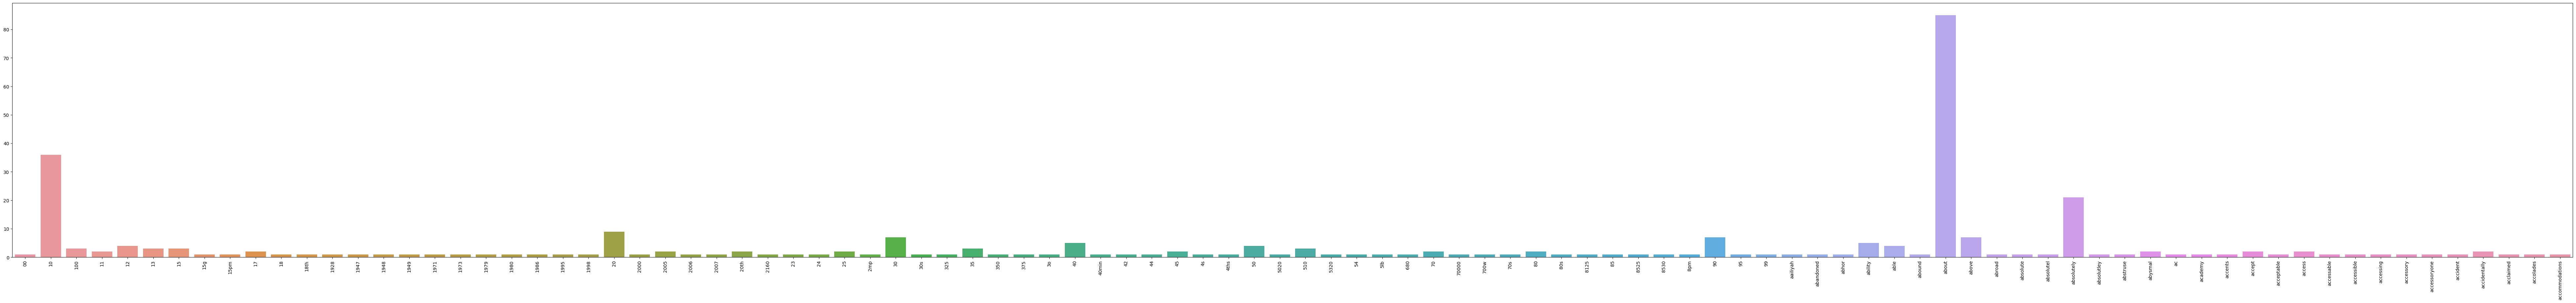

In [43]:
# ATTRIBUTE TRANSFORMATION / AGGREGATION

import numpy as np

# compute frequencies of each term in all documents
term_frequencies = np.asarray(DF_counts.sum(axis=0))[0]

# plot the frequency of the first 100 terms
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90)

**Exercise 13** If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [44]:
# plot frequencies of the first 100 terms using plotly library
import plotly.express as px

# create a DataFrame for Plotly Express
data = {
    "Feature Name": count_vect.get_feature_names_out()[:100],
    "Term Frequencies": term_frequencies[:100]
}
df = pd.DataFrame(data)

# create a bar plot using Plotly Express
fig = px.bar(df, x="Feature Name", y='Term Frequencies')
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for readability

# set the figure's size
# fig.update_layout(width=1000, height=300)

# show the plot
fig.show()

**Exercise 14** The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [45]:
# reduce the number of terms to visualize by only visualizing the first 100 terms that has frequency more than 1
# create a DataFrame for Plotly Express
data = {
    "Feature Name": count_vect.get_feature_names_out()[:100],
    "Term Frequencies": term_frequencies[0:100]
}
df = pd.DataFrame(data)
df_filtered = df[df['Term Frequencies'] > 1]

# create a bar plot using Plotly Express
fig = px.bar(df_filtered, x="Feature Name", y='Term Frequencies')
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for readability

# set the figure's size
# fig.update_layout(width=1000, height=300)

# show the plot
fig.show()

**Exercise 15** Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


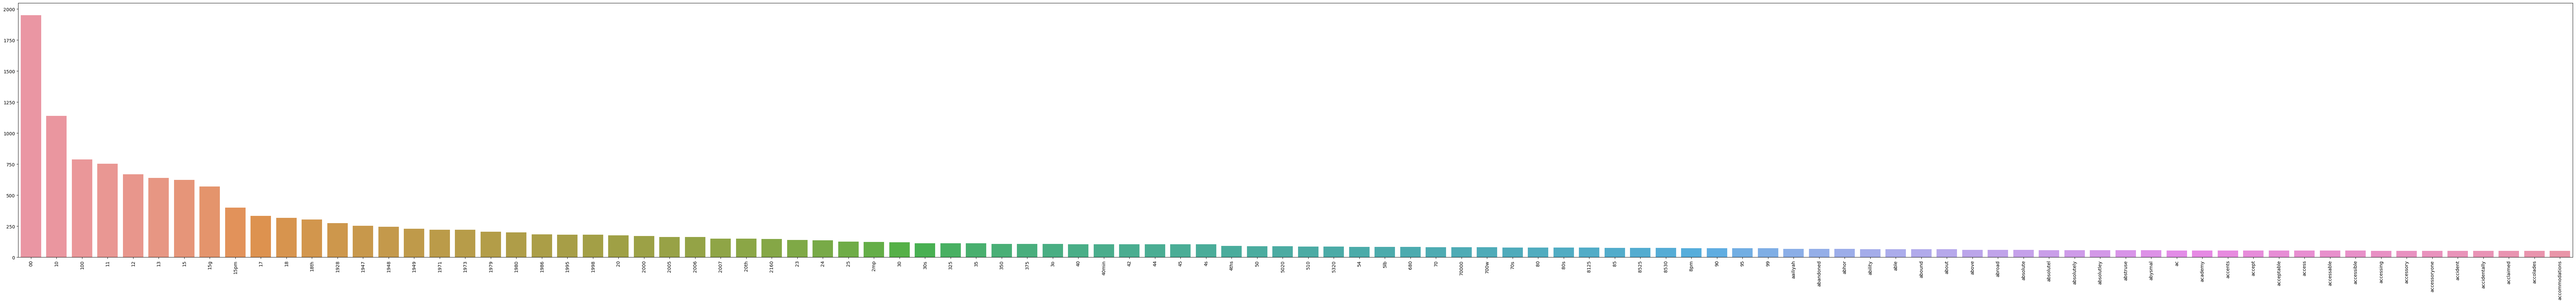

In [46]:
# plot the frequencies of the first 100 terms sorted on the x-axis by frequency instead of in alphabetical order

# sort the terms on the x-axis by frequency
sorted_indices = np.argsort(term_frequencies)[::-1]
sorted_term_frequencies = term_frequencies[sorted_indices]

# plot the first 100 terms of the sorted terms
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[sorted_indices][:100], 
            y=sorted_term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90)

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


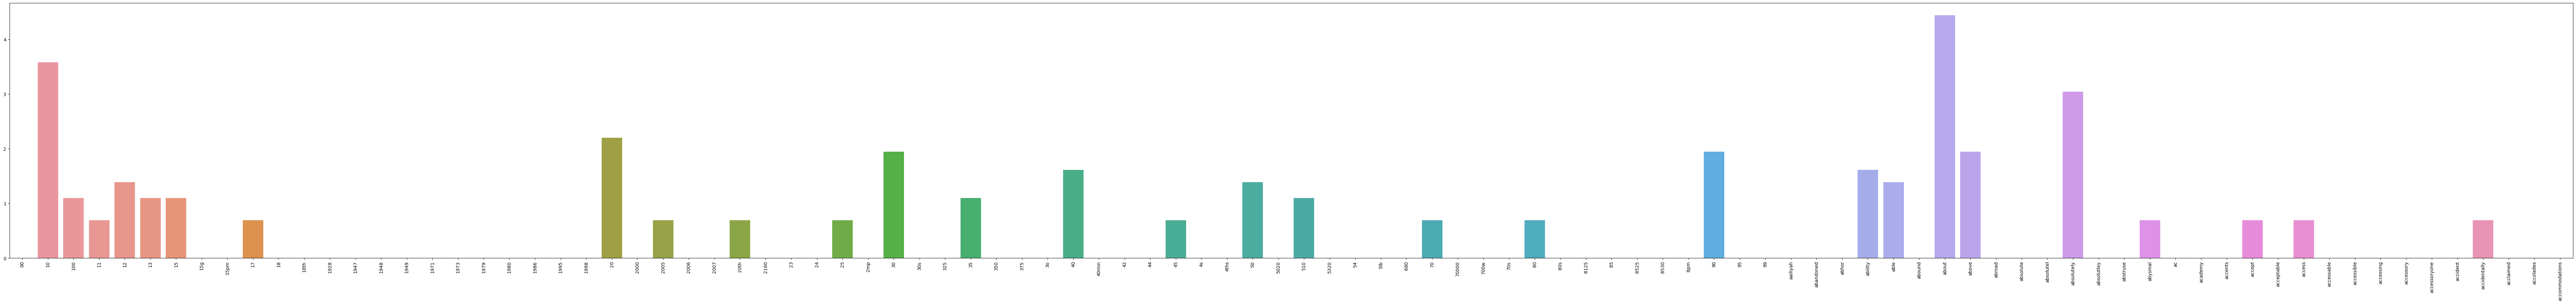

In [47]:
# transform the values in above frequency vector into the log distribution
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

# plot the transformed frequencies of the first 100 terms
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100],
                y=term_frequencies_log[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90)

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


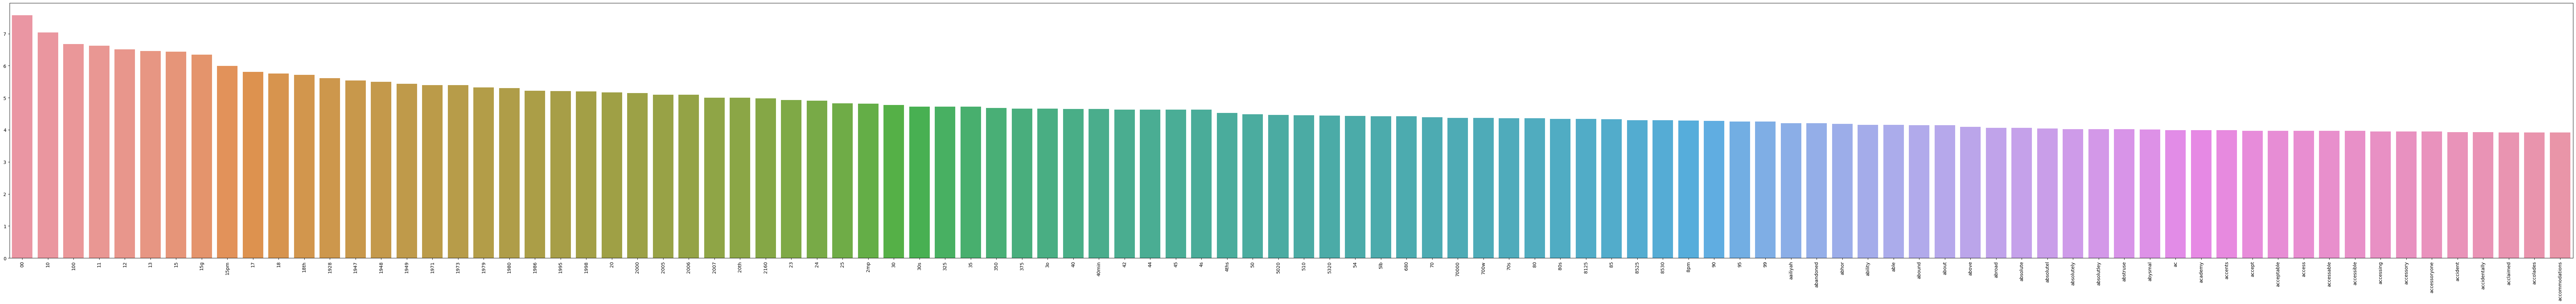

In [48]:
# plot the transformed frequencies of the first 100 terms sorted on the x-axis by frequency instead of in alphabetical order
term_frequencies_log = np.array(term_frequencies_log)
sorted_indices_log = np.argsort(term_frequencies_log)[::-1]
sorted_term_frequencies_log = term_frequencies_log[sorted_indices_log]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[sorted_indices_log][:100], 
            y=sorted_term_frequencies_log[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90)

#### 5.6 Discretization and Binarization

**Exercise 16** Try to generate the binarization using the `category_name` column instead. Does it work?

In [49]:
# DISCRETIZATION AND BINARIZATION
# transform the 'score' attributes into two asymmetric binary attributes. (one-hot encoding)

# from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
# mlb = preprocessing.LabelBinarizer()
# mlb.fit(DF.score)
# DF['bin_score'] = mlb.transform(DF['score']).tolist()

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

# mlb = preprocessing.LabelBinarizer()
# mlb.fit(DF.score)
# DF['bin_score'] = mlb.transform(DF['score']).tolist()

# initialize the one-hot encoder
mlb = preprocessing.OneHotEncoder(sparse=False)
# create new column 'bin_score' to store the one-hot encoding of 'score' column
DF['bin_score'] = mlb.fit_transform(DF['score'].values.reshape(-1, 1)).astype(int).tolist()
DF[0:9]

c:\Users\Gideon\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,sentence,score,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0]"
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]","[0, 1]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]","[0, 1]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...","[1, 0]"
4,The mic is great.,1,"[The, mic, is, great, .]","[0, 1]"
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0]"
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...","[1, 0]"
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...","[0, 1]"
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0]"


#### 6. Data Exploration

In [50]:
# DATA EXPLORATION

# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = DF.iloc[100]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = DF.iloc[200]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = DF.iloc[300]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)


from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())


from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 1 and 2: 0.178174
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## 3.

**Generate meaningful new data visualizations.**

1. Word frequency analysis on positive and negative reviews.

In [51]:
# 1. Word frequency analysis on positive and negative reviews
DF_pos = DF[DF['score'] == 1]
DF_neg = DF[DF['score'] == 0]
print("Length of non-duplicate positive reviews:", len(DF_pos))
print("Length of non-duplicate negative reviews", len(DF_neg))

Length of non-duplicate positive reviews: 1490
Length of non-duplicate negative reviews 1493


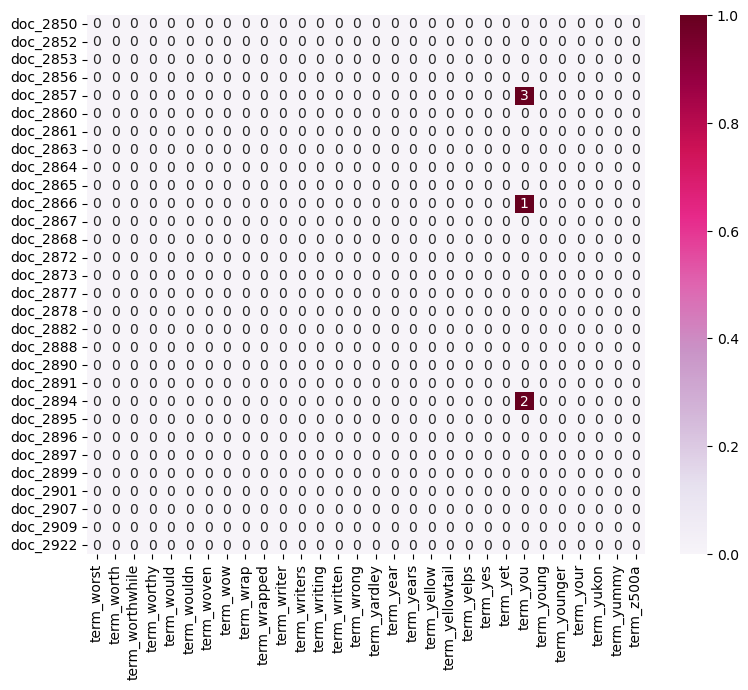

In [52]:
# learn the vocabulary and return document-term matrix of DF_pos
DF_pos_counts = count_vect.fit_transform(DF_pos.sentence) #learn the vocabulary and return document-term matrix

# plot a heatmap of term-document matrix of DF_pos
# last thirty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[-30:]]

# obtain last thirty document index
plot_y = ["doc_"+ str(i) for i in list(DF_pos.index)[-30:]]

plot_z = DF_pos_counts[-30:, -30:].toarray() #DF_pos_counts[how many documents, how many terms]

DF_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(DF_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(DF_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

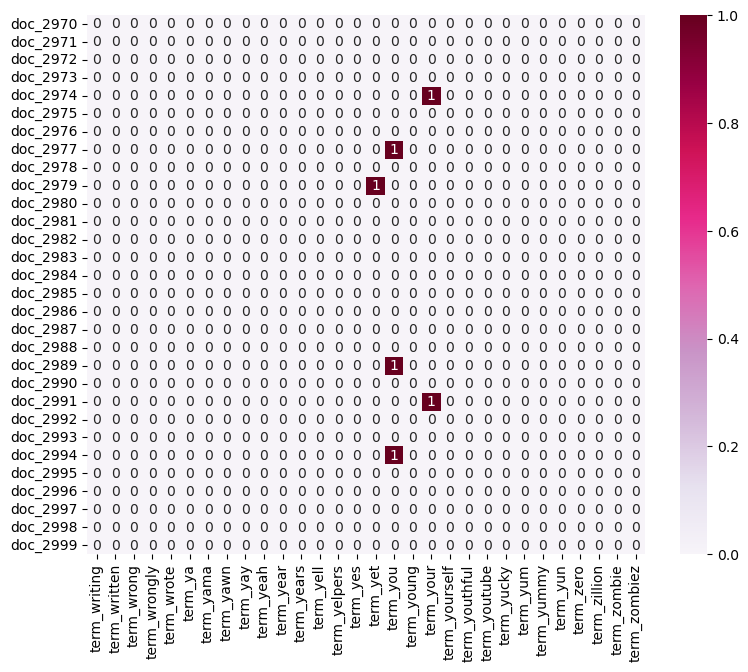

In [53]:
# learn the vocabulary and return document-term matrix of DF_neg
DF_neg_counts = count_vect.fit_transform(DF_neg.sentence) #learn the vocabulary and return document-term matrix

# plot a heatmap of term-document matrix of DF_neg
# last thirty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[-30:]]

# obtain last thirty document index
plot_y = ["doc_"+ str(i) for i in list(DF_neg.index)[-30:]]

plot_z = DF_neg_counts[-30:, -30:].toarray() #DF_neg_counts[how many documents, how many terms]

DF_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(DF_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(DF_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

2. Generate word clouds for all terms, terms in positive reviews, and terms in negative reviews each.

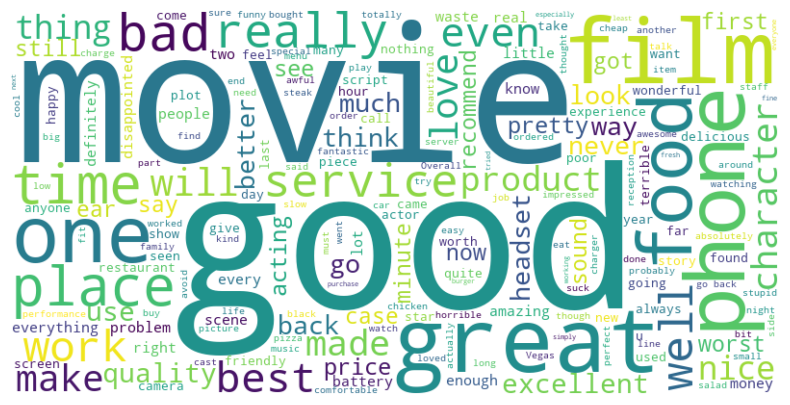

In [54]:
# 2. Generate word clouds for all terms, terms in positive reviews, and terms in negative reviews each

import wordcloud

# word clouds for all terms
sentences = ' '.join(DF['sentence'])
wordcloud_all = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(sentences)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis("off")
plt.show()

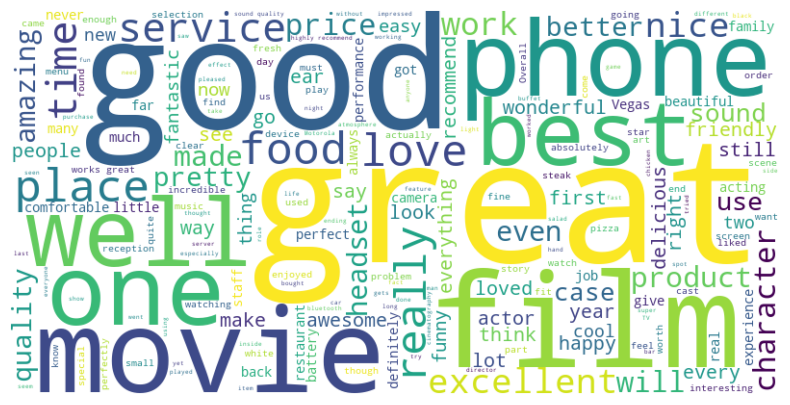

In [55]:
# word clouds for terms in positive reviews
sentences_pos = ' '.join(DF_pos['sentence'])
wordcloud_pos = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(sentences_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

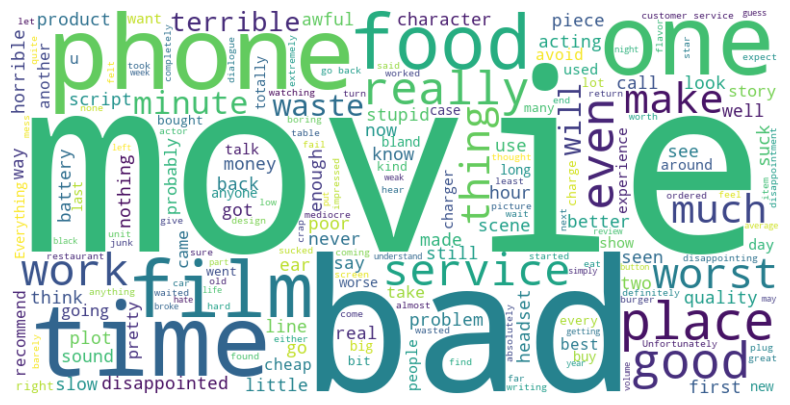

In [56]:
# word clouds for terms in negative reviews
sentences_neg = ' '.join(DF_neg['sentence'])
wordcloud_neg = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(sentences_neg)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

3. Find if there is any relationship between review length and score of the review

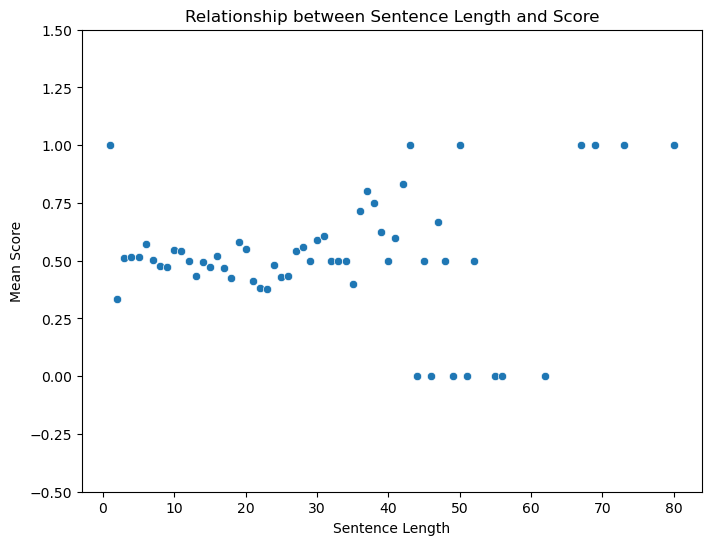

In [57]:
# 3. Find if there is any relationship between review length and score of the review

# calculate the length of each review and store it as a new column
DF['sentence_length'] = DF['unigrams'].apply(len)

# Group by sentence length and compute mean score for each group
score_by_length = DF.groupby('sentence_length')['score'].mean().reset_index()

# Create a scatterplot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentence_length', y='score', data=score_by_length)
plt.xlabel('Sentence Length')
plt.ylabel('Mean Score')
plt.title('Relationship between Sentence Length and Score')
plt.ylim(-0.5, 1.5)

# Show the plot
plt.show()

Since there is no noticeable patterns or trends in the graph, there is no relationship between review sentence length and its score.

4. Review sentence length distribution

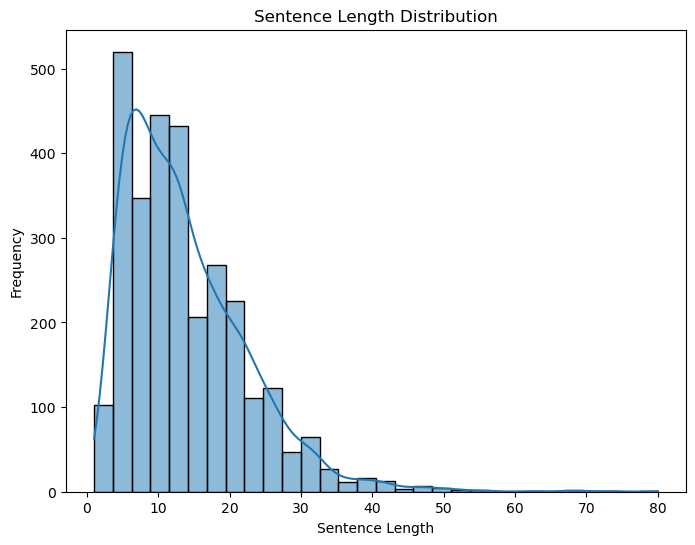

In [58]:
# 4. Review sentence length distribution

plt.figure(figsize=(8, 6))
sns.histplot(DF['sentence_length'], bins=30, kde=True)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Sentence Length Distribution')
plt.show()

5. Term count distribution

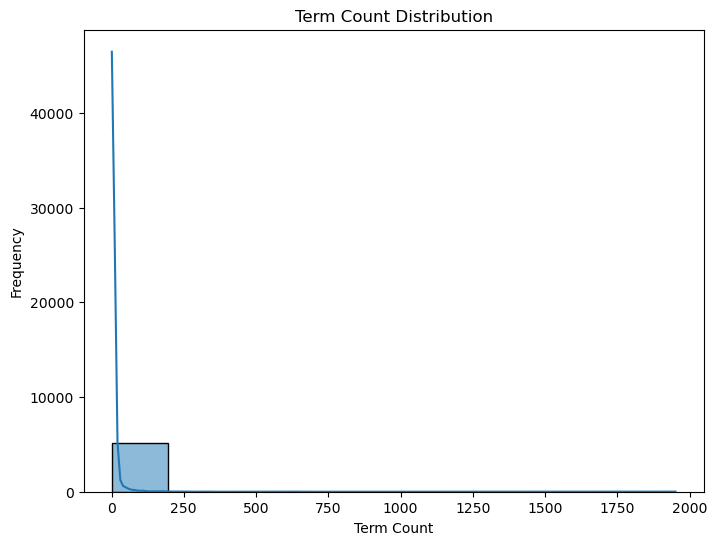

In [59]:
# 5. Term count distribution

# plot a distributon of word counts
plt.figure(figsize=(8, 6))
sns.histplot(term_frequencies, bins=10, kde=True)
plt.xlabel('Term Count')
plt.ylabel('Frequency')
plt.title('Term Count Distribution')
plt.show()

Because there are not much information we can see in the plot of term count distribution, I also plot a log distribution of term sounts.

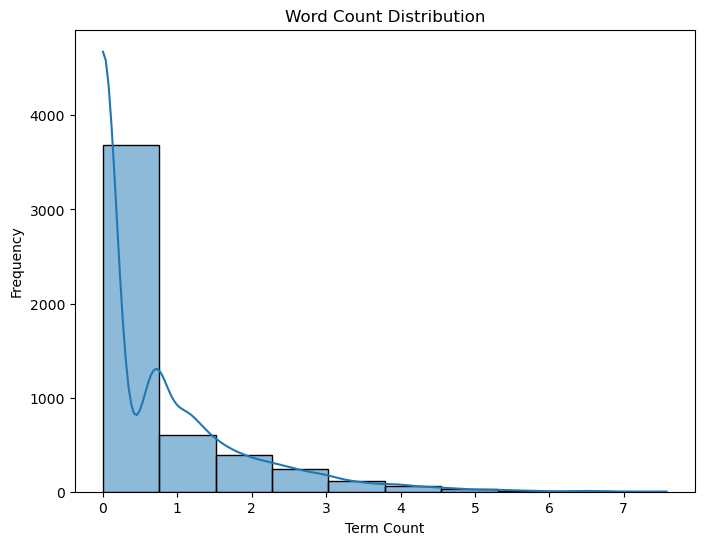

In [60]:
# plot a log distribution of term counts
plt.figure(figsize=(8, 6))
sns.histplot(term_frequencies_log, bins=10, kde=True)
plt.xlabel('Term Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution')
plt.show()

6. Word frequency positive negative review

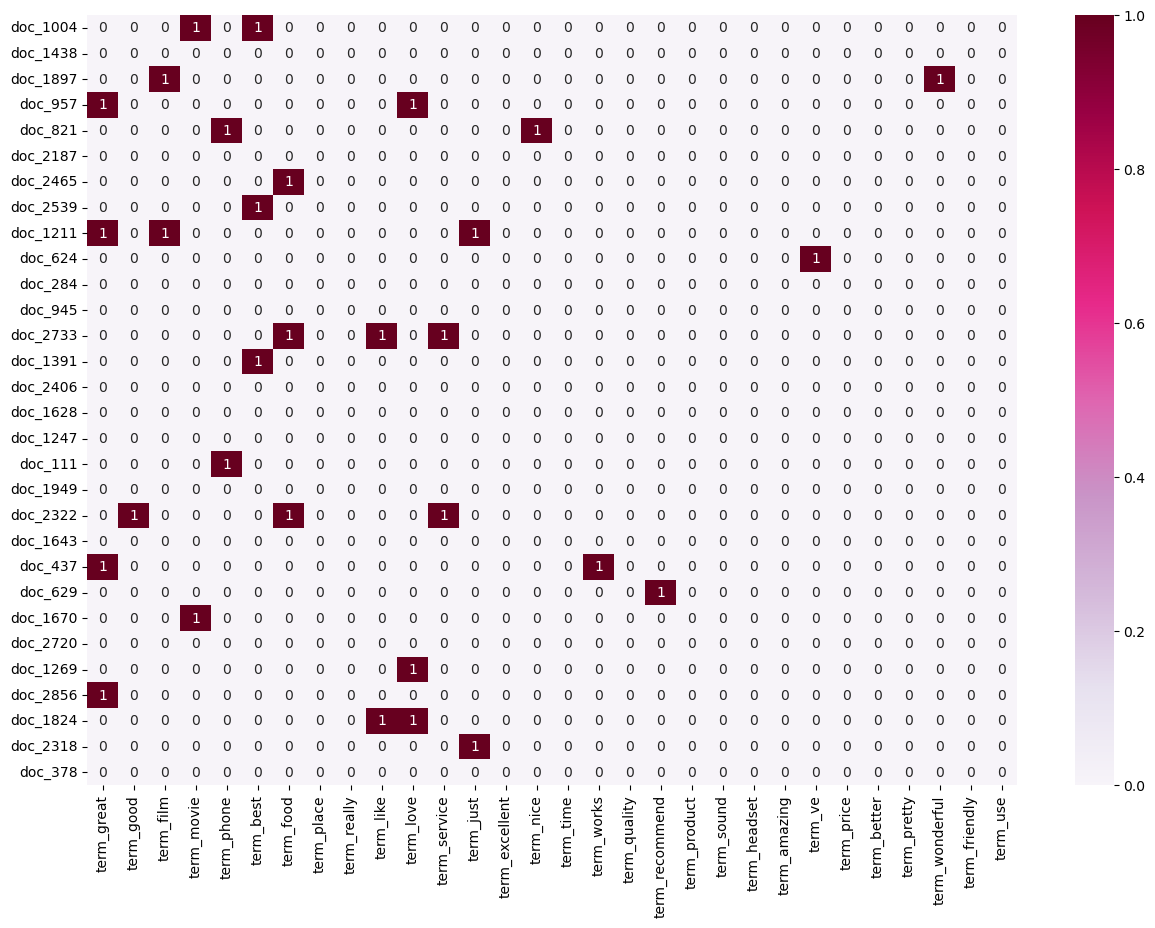

In [61]:
# 6. Word frequency positive negative review


# POSITIVE REVIEWS
count_vect = CountVectorizer(stop_words='english') # set stop_words to 'english' to exclude stop words
# learn the vocabulary and return document-term matrix
DF_pos_counts = count_vect.fit_transform(DF_pos['sentence'])

# calculate each term frequencies in positive reviews' documents
term_frequencies_pos = np.asarray(DF_pos_counts.sum(axis=0))[0]

# Take terms with top 30 frequencies

# sort the term frequencies in descending order and get the indices of the top 30 terms
top30_terms_indices_pos = np.argsort(term_frequencies_pos)[::-1][:30]

y_sample = np.random.choice(DF_pos_counts.shape[0], size=30, replace=False)

# obtain terms names
plot_x = ["term_"+str(count_vect.get_feature_names_out()[i]) for i in top30_terms_indices_pos]
# print(plot_x)

# obtain document index
plot_y = ["doc_"+ str(DF_pos.index[i]) for i in y_sample]
# print(plot_y)

# X_counts[how many documents, how many terms]
plot_z = DF_pos_counts[y_sample][:, top30_terms_indices_pos].toarray() 
# print(plot_z)

# plot the heat-map for the above term-document  matrix
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max(np.ndarray.flatten(plot_z)), annot=True)

In [62]:
# create a DataFrame for Plotly Express
data = {
    "Feature Name": ["term_"+str(count_vect.get_feature_names_out()[i]) for i in top30_terms_indices_pos],
    "Term Frequencies": term_frequencies_pos[top30_terms_indices_pos]
}
df = pd.DataFrame(data)

# create a bar plot using Plotly Express
fig = px.bar(df, x="Feature Name", y='Term Frequencies')
fig.update_xaxes(tickangle=-90)  # Rotate x-axis labels for readability

# set the figure's size
# fig.update_layout(width=1000, height=300)

# show the plot
fig.show()

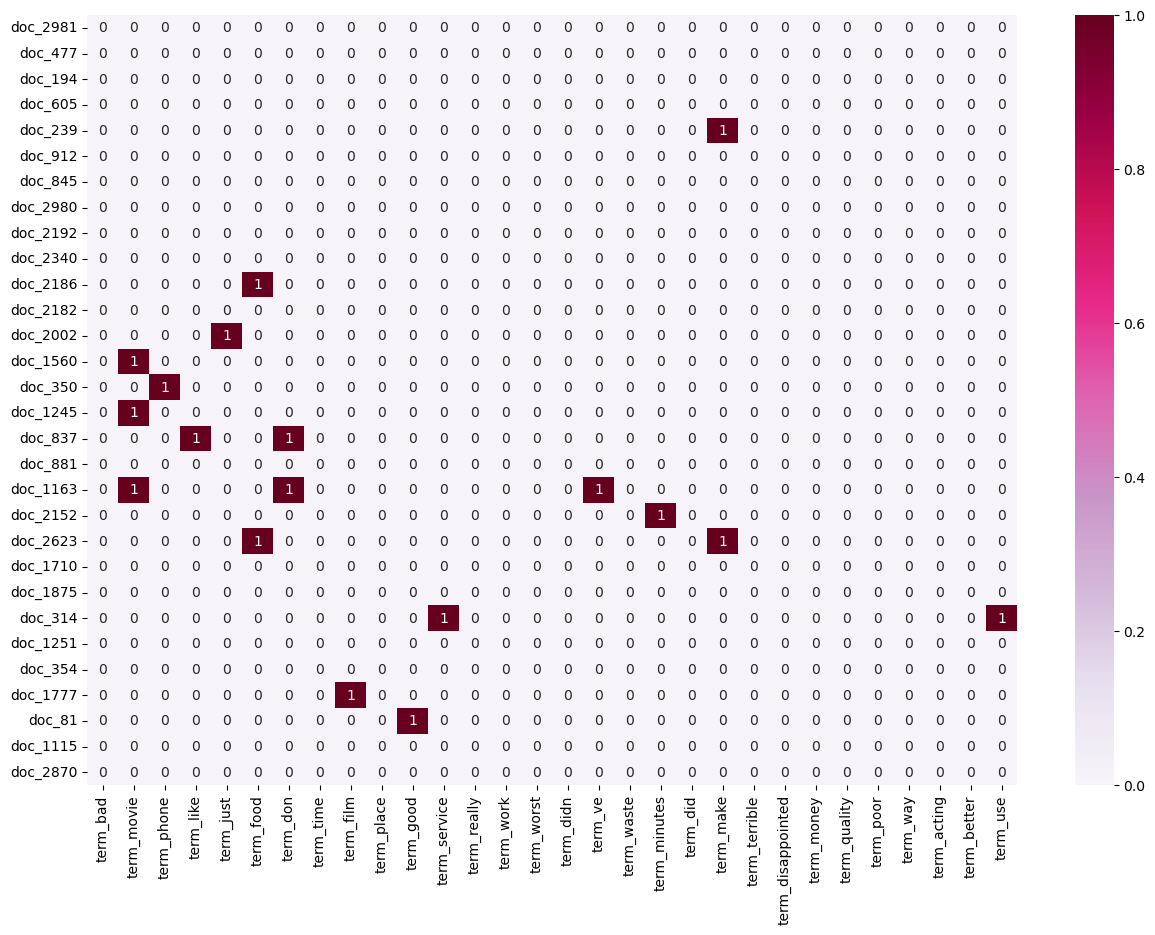

In [63]:
# NEGATIVE REVIEWS

# learn the vocabulary and return document-term matrix
DF_neg_counts = count_vect.fit_transform(DF_neg['sentence'])

# calculate each term frequencies in negative reviews' documents
term_frequencies_neg = np.asarray(DF_neg_counts.sum(axis=0))[0]

# Take terms with top 30 frequencies

# sort the term frequencies in descending order and get the indices of the top 30 terms
top30_terms_indices_neg = np.argsort(term_frequencies_neg)[::-1][:30]

y_sample = np.random.choice(DF_neg_counts.shape[0], size=30, replace=False)

# obtain terms names
plot_x = ["term_"+str(count_vect.get_feature_names_out()[i]) for i in top30_terms_indices_neg]
# print(plot_x)

# obtain document index
plot_y = ["doc_"+ str(DF_neg.index[i]) for i in y_sample]
# print(plot_y)

# X_counts[how many documents, how many terms]
plot_z = DF_neg_counts[y_sample][:, top30_terms_indices_neg].toarray() 
# print(plot_z)

# plot the heat-map for the above term-document  matrix
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max(np.ndarray.flatten(plot_z)), annot=True)

In [64]:
# create a DataFrame for Plotly Express
data = {
    "Feature Name": ["term_"+str(count_vect.get_feature_names_out()[i]) for i in top30_terms_indices_neg],
    "Term Frequencies": term_frequencies_neg[top30_terms_indices_neg]
}
df = pd.DataFrame(data)

# create a bar plot using Plotly Express
fig = px.bar(df, x="Feature Name", y='Term Frequencies')
fig.update_xaxes(tickangle=-90)  # Rotate x-axis labels for readability

# set the figure's size
# fig.update_layout(width=1000, height=300)

# show the plot
fig.show()

7. Screeplot

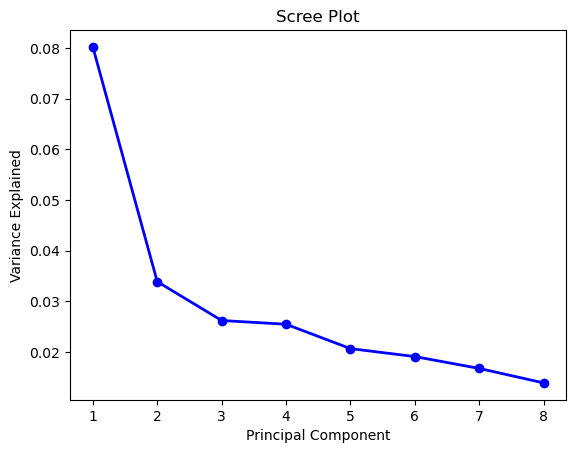

In [65]:
# 7. Screeplot
# TODO

#define PCA model to use and fit PCA model to data

pca = PCA(n_components=8).fit(DF_counts.toarray())

# 
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.show()

A common method for deciding the optimal number of components is to look for a point in the scree plot, which is a point at which adding more components does not significantly increase the explained variance.
From the scree plot above, we can see that Principal Component 1 is dominant and explains a significant portion of the variability in the data. We can also see that later principal components drop and remains relatively flat, this indicates the later principal components explain less variance and are less informative. In this case, we may condiser retaining Principal Component 1 as it captures the majority of the variance.

**Generate TF-IDF features from the tokens of each teDFt.**

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

# calling the TfidfVectorizer
tfidf_vect = TfidfVectorizer()

# fitting the model passing sentences
Tfidf_vector = tfidf_vect.fit_transform(DF['sentence'])
print(Tfidf_vector)

  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557
  (1, 4861)	0.633627682893175
  (1, 1603)	0.47208678028809276
  (1, 713)	0.512627326445873
  (1, 1993)	0.3359512695758188
  (2, 2449)	0.8223576509783525
  (2, 2023)	0.40205777854454006
  (2, 4531)	0.1950221671536334
  :	:
  (2982, 1387)	0.29330938809811624
  (2982, 5110)	0.29330938809811624
  (2982, 3437)	0.29330938809811624
  (2982, 3857)	0.26883783193000615
  (2982, 2068)	0.27899444540548035
  (2982, 588)	0.24436627576189607
 

**Implement a simple Naive Bayes classifier that automatically classifies the records into their categories.**

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


# TF-IDF features
X_train, X_test, y_train, y_test = train_test_split(DF['sentence'], DF['score'], test_size=0.3, random_state=0)
tfidf_vect = TfidfVectorizer()
X_train = tfidf_vect.fit_transform(X_train)
X_test = tfidf_vect.transform(X_test)
# 
mnb = MultinomialNB()
my_model = mnb.fit(X_train, y_train)
# predict y_train
y_train_pred = my_model.predict(X_train)
# predict y_test
y_test_pred = my_model.predict(X_test)

# print accuracy of model on train dataset
print("Accuracy of model on train dataset:", metrics.accuracy_score(y_train, y_train_pred))
# print accuracy of model on test dataset
print("Accuracy of model on test dataset:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy of model on train dataset: 0.9492337164750958
Accuracy of model on test dataset: 0.8268156424581006


Since the difference of model accuracy on train dataset and test dataset is relatively high, it indicates overfitting of our model. To address this, I increase the value of hyperparameter of MultinomialNB() object called alpha, so that the model would less likely to "memorize". Increasing the value of alpha will apply stronger smoothing to the model, which helps in reducing the impact of rare words or features and makes the model more robust to data sparsity. It can also prevent the model from assigning zero probabilities to unseen words. However, excessively high values of alpha may oversmooth the model, leading to underfitting.

In [68]:
# Overfitting solution
# 
mnb = MultinomialNB(alpha=50)
my_model = mnb.fit(X_train, y_train)
# predict y_train
y_train_pred = my_model.predict(X_train)
# predict y_test
y_test_pred = my_model.predict(X_test)

# print accuracy of model on train dataset
print("Accuracy of model on train dataset:", metrics.accuracy_score(y_train, y_train_pred))
# print accuracy of model on test dataset
print("Accuracy of model on test dataset:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy of model on train dataset: 0.8386015325670498
Accuracy of model on test dataset: 0.7810055865921788


In [69]:
# Word frequency features

count_vect = CountVectorizer()
X_train, X_test, y_train, y_test = train_test_split(DF['sentence'], DF['score'], test_size=0.30, random_state=0)
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)
#
mnb = MultinomialNB()
# predict y_train
y_train_pred = mnb.fit(X_train, y_train).predict(X_train)
# predict y_test
y_test_pred = mnb.fit(X_train, y_train).predict(X_test)

# print accuracy of model on train dataset
print("Accuracy of model on train dataset:", metrics.accuracy_score(y_train, y_train_pred))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_train != y_train_pred).sum()))
# print accuracy of model on test dataset
print("Accuracy of model on test dataset:", metrics.accuracy_score(y_test, y_test_pred))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_test_pred).sum()))

Accuracy of model on train dataset: 0.9468390804597702
Number of mislabeled points out of a total 895 points : 111
Accuracy of model on test dataset: 0.8335195530726257
Number of mislabeled points out of a total 895 points : 149


Similarly, the difference of accuracy strongly indicates overfitting of our model. So I address this problem using the same method.

In [70]:
mnb = MultinomialNB(alpha=50)
# predict y_train
y_train_pred = mnb.fit(X_train, y_train).predict(X_train)
# predict y_test
y_test_pred = mnb.fit(X_train, y_train).predict(X_test)

# print accuracy of model on train dataset
print("Accuracy of model on train dataset:", metrics.accuracy_score(y_train, y_train_pred))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_train != y_train_pred).sum()))
# print accuracy of model on test dataset
print("Accuracy of model on test dataset:", metrics.accuracy_score(y_test, y_test_pred))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_test_pred).sum()))

Accuracy of model on train dataset: 0.8022030651340997
Number of mislabeled points out of a total 895 points : 413
Accuracy of model on test dataset: 0.7687150837988826
Number of mislabeled points out of a total 895 points : 207


## 4. 
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

1. binarization: can change one-hot encoding to dummy encoding, to reduce redundant code.
2. remove stop words in feature subset selection.
3. use screeplot for pca to determine the optimal n-components.
4. before sampling, we need to make sure that the categories distribution are equal or at least similar, or else
the sample retrieved will also be unbalanced.
5. remove email, address, telephone, fax, name from the 'sentence' data as those data are not important.
in categorizing the sentence.
6. Use Lemmatization after tokenization to reduce noise. for example Lemmatization gives more context to chatbot conversations as it recognizes words based on their exact and contextual meaning.
7. add new features such as n-grams, tri-grams, bi-grams, etc.
8. remove xxx from 'sentence' data using regex.

1. Remove stop words. Stop words are common words such as "the," "and," "is," "in," etc., that are considered noise words that do not carry significant meaning on their own. By pruning stop words, we can reduce dimensionality, reduce noise, and focus more on important words. Below is an example of removing stop words using nltk library:

In [81]:
from nltk.corpus import stopwords

# download NLTK stop words if not already downloaded
nltk.download('stopwords')

# sample text
text = "This is an example sentence with some stop words."

# tokenize the text
words = text.split()

# remove stop words
filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]

# join the filtered words to form a clean text
clean_text = " ".join(filtered_words)

print(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gideon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


example sentence stop words.


2. In the lab, we used PCA to reduce the dimensions of our dataset to 2-components and 3-components, and compared them. Although we were able to know that increasing the components from 2 to 3 does not have significant increase in variance explained, we still don't know the optimal n-components. To address this, we can use screeplot to determine the optimal n-components before reducing dimensionality using PCA. This way we can reduce the dataset to a certain dimensions more efficiently. Below is an example to plot a screeplot:

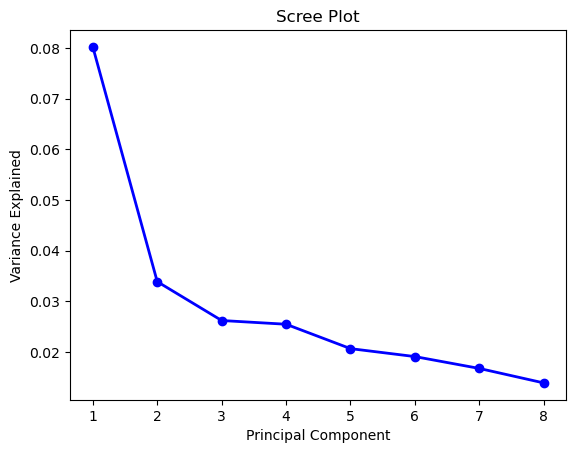

In [82]:
# define PCA model to use and fit PCA model to data
pca = PCA(n_components=8).fit(DF_counts.toarray())
# 
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

3. Since the context of our dataset analysis is about the sentiment of the review sentences, some information such as email address, telephone number, fax number, dates, url, or name from the review sentences are not important. Therefore we can try to prune these information from our sentence data as our data cleaning preprocessing process. We can prune informations above with regular expressions. Below are some examples:

In [71]:
import re

# remove email addresses
text = "Contact us at info@example.com or support@domain.com"
cleaned_text = re.sub(r'\b[\w.-]+@[\w.-]+\.\w+\b', '', text)
print(cleaned_text)

# remove urls
text = "Visit our website at https://www.example.com for more information."
cleaned_text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
print(cleaned_text)

# remove dates
text = "The event is on 12/25/2023 or 25-12-23."
cleaned_text = re.sub(r'\d{1,2}[-/]\d{1,2}[-/]\d{2,4}', '', text)
print(cleaned_text)

Contact us at  or 
Visit our website at  for more information.
The event is on  or .


4. Try to use lemmatization after tokenization. Lemmatization is a text normalization technique that reduces words to their base or dictionary form (lemma). Not only it can help in standardizing text and improving the quality of text analysis, it can also reduce dimensionality and handle verb tenses better. Below are an example on how to do lemmatization with spacy library:

In [72]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gideon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
import spacy

# load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# text to be lemmatized
text = "The cats are running and the mice are hiding."

# process the text using spaCy
doc = nlp(text)

# lemmatize the text
lemmatized_text = ' '.join([token.lemma_ for token in doc])

print(lemmatized_text)

the cat be run and the mouse be hide .


5. Other than Lemmatization, there is also another slightly different text normalization technique used to reduce words to their base or root form, called Stemming. Stemming is a more aggressive text normalization technique that removes or truncates word endings to obtain a common base form. It uses heuristic rules to accomplish this. Although stemmed words may not be valid words in the language, and they can be quite different from the original word, it is generally faster and simpler to implement than Lemmatization. It is commonly used in tasks where speed and simplicity are more important than preserving linguistic accuracy. Below is an example of stemming using nltk library:

In [84]:
from nltk.stem import PorterStemmer

# create a stemmer object
stemmer = PorterStemmer()

# text to be stemmed
text = "The cats are running and the mice are hiding."

# tokenize the text and apply stemmed
tokens = text.split()
stemmed_tokens = [stemmer.stem(token) for token in tokens]

print(' '.join(stemmed_tokens))

the cat are run and the mice are hiding.


6. In the lab we created a new feature 'unigrams' to the dataset, but this 'unigrams' feature can only capture individual words. We can also add n-grams features such as bi-grams, tri-grams, and more. With n-grams we can capture not only individual words but also combinations of words that form meaningful phrases, which is iportant for tasks like sentiment analysis. N-grams can also help mantain the context of words within a certain window and reducing sparsity. Below is an example:

In [79]:
# sample text data
text_data = [
    "This is an example of n-grams in text data.",
    "N-grams can capture sequences of words.",
    "They are useful for text analysis.",
]

# create a CountVectorizer with n-gram range (e.g. 2-grams, 3-grams)
vectorizer = CountVectorizer(ngram_range=(2, 3))  # This creates bigrams and trigrams

# fit and transform the text data
X = vectorizer.fit_transform(text_data)

# get the feature names (n-grams)
feature_names = vectorizer.get_feature_names_out()

# convert the transformed data to a DataFrame
import pandas as pd
X_df = pd.DataFrame(X.toarray(), columns=feature_names)

# print the DataFrame with n-gram features
print(X_df)

   an example  an example of  are useful  are useful for  can capture  \
0           1              1           0               0            0   
1           0              0           0               0            1   
2           0              0           1               1            0   

   can capture sequences  capture sequences  capture sequences of  example of  \
0                      0                  0                     0           1   
1                      1                  1                     1           0   
2                      0                  0                     0           0   

   example of grams  ...  sequences of  sequences of words  text analysis  \
0                 1  ...             0                   0              0   
1                 0  ...             1                   1              0   
2                 0  ...             0                   0              1   

   text data  they are  they are useful  this is  this is an  useful for 